<a href="https://colab.research.google.com/github/MahdiNavaei/Forcast-euro-yen/blob/main/Forcast_euro_yen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime,timedelta
import scipy
import pylab
import statsmodels.tsa.stattools as sts

In [2]:
api_key = 'e61479fbc59d62f40c959bd6021e9df48b79c324'

In [3]:
end = datetime.now()
start = end - timedelta(days=365)
start_date = start.replace(hour=0, minute=0, second=0, microsecond=0) - timedelta(days=365)
end = start.strftime('%Y-%m-%d %H:%M:%S')


In [4]:
ticker = 'EURJPY'

In [5]:
interval = '1hour'

In [6]:
url = f'https://api.tiingo.com/tiingo/fx/{ticker}/prices?startDate={start_date}&endDate={end}&resampleFreq={interval}&token={api_key}'


In [7]:
response = requests.get(url)

In [8]:
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)

    # ذخیره داده ها در یک فایل اکسل
    df.to_excel('stock_data.xlsx', index=False)
    print('Data saved successfully.')
else:
    print("Error receiving data")

Data saved successfully.


In [9]:
df= pd.DataFrame(df)
df['date']=pd.to_datetime(df['date'])
df

,date,ticker,open,high,low,close
0,2021-03-15 00:00:00+00:00,eurjpy,130.3975,130.4055,130.2975,130.3405
1,2021-03-15 01:00:00+00:00,eurjpy,130.3410,130.4205,130.3280,130.4145
2,2021-03-15 02:00:00+00:00,eurjpy,130.4155,130.4695,130.3325,130.3955
3,2021-03-15 03:00:00+00:00,eurjpy,130.3945,130.4615,130.3845,130.4485
4,2021-03-15 04:00:00+00:00,eurjpy,130.4490,130.4895,130.3785,130.3955
...,...,...,...,...,...,...
6160,2022-03-15 10:00:00+00:00,eurjpy,129.8345,129.8345,129.6970,129.7630
6161,2022-03-15 11:00:00+00:00,eurjpy,129.7640,129.8350,129.4940,129.5010
6162,2022-03-15 12:00:00+00:00,eurjpy,129.5000,129.7865,129.4440,129.6640
6163,2022-03-15 13:00:00+00:00,eurjpy,129.6650,129.7000,129.4910,129.6220


In [10]:
df['date'] = df['date'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [11]:
df.set_index('date',inplace=True)
df

,ticker,open,high,low,close
date,,,,,
15-03-2021 00:00:00,eurjpy,130.3975,130.4055,130.2975,130.3405
15-03-2021 01:00:00,eurjpy,130.3410,130.4205,130.3280,130.4145
15-03-2021 02:00:00,eurjpy,130.4155,130.4695,130.3325,130.3955
15-03-2021 03:00:00,eurjpy,130.3945,130.4615,130.3845,130.4485
15-03-2021 04:00:00,eurjpy,130.4490,130.4895,130.3785,130.3955
...,...,...,...,...,...
15-03-2022 10:00:00,eurjpy,129.8345,129.8345,129.6970,129.7630
15-03-2022 11:00:00,eurjpy,129.7640,129.8350,129.4940,129.5010
15-03-2022 12:00:00,eurjpy,129.5000,129.7865,129.4440,129.6640


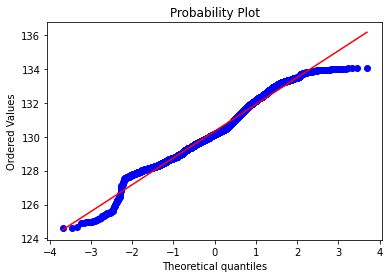

In [12]:
scipy.stats.probplot(df.open,plot=pylab)
pylab.show()

In [13]:
sts.adfuller(df.open)

(-2.651257717640691,
 0.08285919086204274,
 0,
 6164,
 {'1%': -3.4314113279237977,
  '5%': -2.862009011671878,
  '10%': -2.5670196521269593},
 -9827.325931189593)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

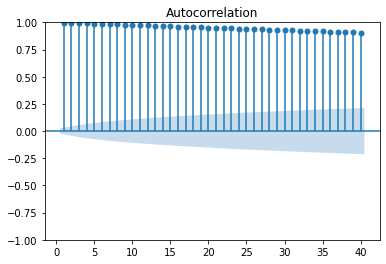

In [15]:
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.open,lags=40,zero=False)
plt.show()

q = 2 or 3

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


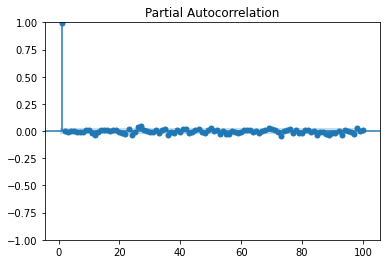

In [16]:
#pacf Plot

sgt.plot_pacf(df.open,lags=100,zero=False)
plt.show()

In [17]:
size= int(len(df)*0.8)
train= df.iloc[:size,:]
test=df.iloc[size:,:]
train

,ticker,open,high,low,close
date,,,,,
15-03-2021 00:00:00,eurjpy,130.3975,130.4055,130.2975,130.3405
15-03-2021 01:00:00,eurjpy,130.3410,130.4205,130.3280,130.4145
15-03-2021 02:00:00,eurjpy,130.4155,130.4695,130.3325,130.3955
15-03-2021 03:00:00,eurjpy,130.3945,130.4615,130.3845,130.4485
15-03-2021 04:00:00,eurjpy,130.4490,130.4895,130.3785,130.3955
...,...,...,...,...,...
03-01-2022 00:00:00,eurjpy,130.9540,131.0015,130.9130,130.9815
03-01-2022 01:00:00,eurjpy,130.9810,131.0050,130.7920,130.8690
03-01-2022 02:00:00,eurjpy,130.8695,130.8695,130.7525,130.7585


In [18]:
import statsmodels.api as sm 
model=sm.tsa.arima.ARIMA(train.open,order=(2,0,2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [19]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   open   No. Observations:                 4932
Model:                 ARIMA(2, 0, 2)   Log Likelihood                4659.117
Date:                Wed, 15 Mar 2023   AIC                          -9306.234
Time:                        14:20:47   BIC                          -9267.213
Sample:                             0   HQIC                         -9292.548
                               - 4932                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.5498      0.689    189.382      0.000     129.199     131.901
ar.L1          1.9649      0.226      8.704      0.000       1.522       2.407
ar.L2         -0.9649      0.225     -4.283      0.000      -1.407      -0.523
ma.L1         -0.9858      0.226     -4.365      0.000      -1.428      -0.543
ma.L2          0.0194      0.011      1.786      0.074      -0.002       0.041
sigma2         0.0088   9.95e-05     88.833      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4874.97
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

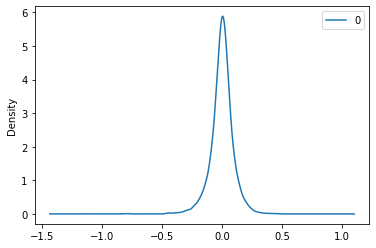

In [20]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

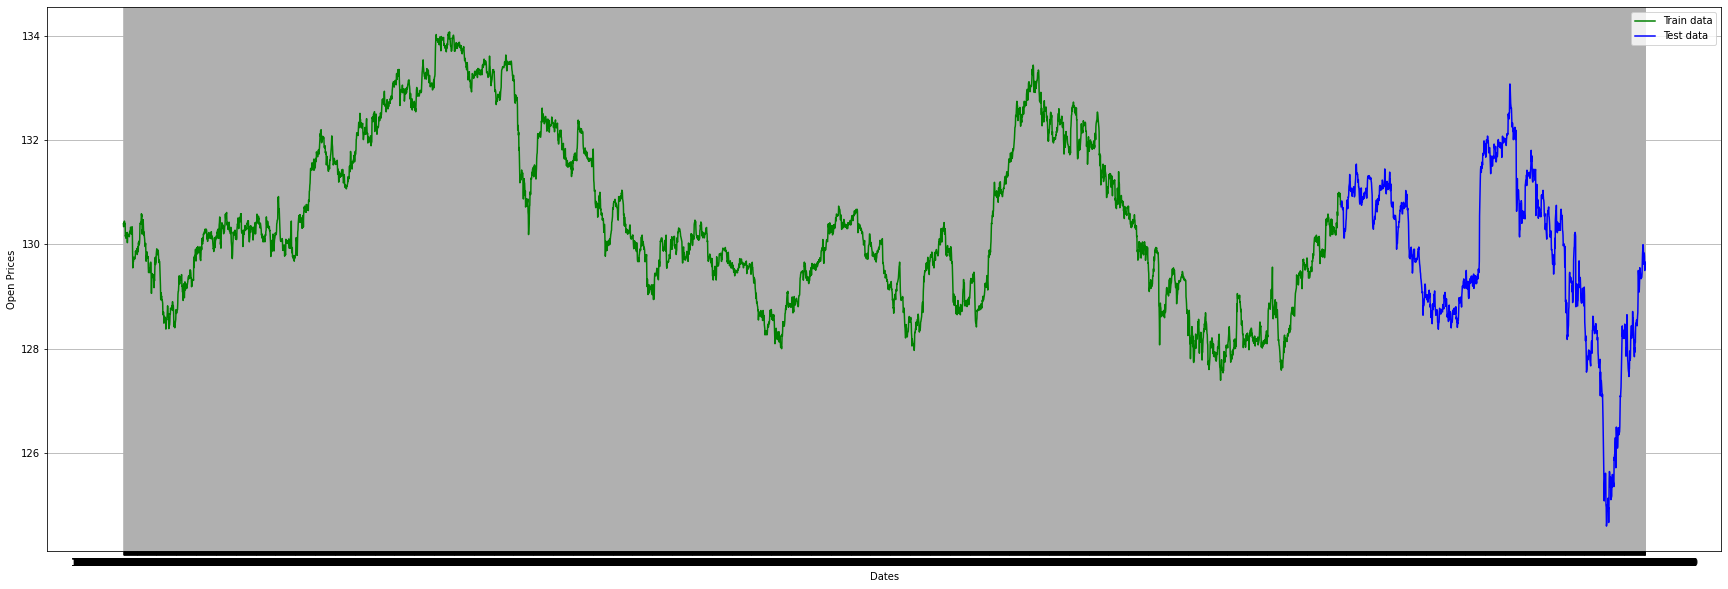

In [21]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(train.open,'green',label='Train data')
plt.plot(test.open,'blue',label='Test data')
plt.legend()
plt.show()

In [22]:
test.open

date
03-01-2022 05:00:00    130.7250
03-01-2022 06:00:00    130.7390
03-01-2022 07:00:00    130.8285
03-01-2022 08:00:00    130.8355
03-01-2022 09:00:00    130.7820
                         ...   
15-03-2022 10:00:00    129.8345
15-03-2022 11:00:00    129.7640
15-03-2022 12:00:00    129.5000
15-03-2022 13:00:00    129.6650
15-03-2022 14:00:00    129.6350
Name: open, Length: 1233, dtype: float64

In [25]:
start= '03-01-2022 05:00:00'
end= '15-03-2022 14:00:00'

In [ ]:
history = [x for x in train.open]
pred = list()
for t in range (len(test.open[start:end])):
    model=sm.tsa.arima.ARIMA(history,order=(2,1,2))
    result= model.fit()
    output=result.forecast()
    yhat=output[0]
    pred.append(yhat)
    obs=test.open[t]
    history.append(obs)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

In [ ]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r')
test.open[start:end].plot(figsize=(20,5),c='b')
plt.show()

# New Section